# Introduction to Convolutional Neural Networks and Computer Vision with TensroFlow

Computer vision is the practice of writing algorithms which can discover patterns in visula data. Such as the camera of a self-driving car recognizing the car in front.

**note:** We start with a smaller dataset so we can experiment quickly and figure what works


## Get the data

In [1]:
import zipfile

zip_ref=zipfile.ZipFile("/content/drive/MyDrive/ztm/pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()


## Inspect the data (become one with it)

In [2]:
!ls pizza_steak

test  train


In [3]:
!ls pizza_steak/train/

pizza  steak


In [4]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [5]:
import os

# walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in'{dirpath}'.")

There are 2 directories and 0 images in'pizza_steak'.
There are 2 directories and 0 images in'pizza_steak/train'.
There are 0 directories and 750 images in'pizza_steak/train/pizza'.
There are 0 directories and 750 images in'pizza_steak/train/steak'.
There are 2 directories and 0 images in'pizza_steak/test'.
There are 0 directories and 250 images in'pizza_steak/test/pizza'.
There are 0 directories and 250 images in'pizza_steak/test/steak'.


In [6]:
# Another way to list how many images there are in a file

num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

To visualize our images , first let's get the class names programmatically

In [7]:
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['pizza' 'steak']


In [8]:
# Let's visualize our images

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup the target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)
  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder+"/"+random_image[0])
  plt.imshow(img)
  plt.title("target_class)")
  plt.axis("off");

  print(f"Image shape: {img.shape}")
  # show the shape of the image

  return img

['918506.jpg']
Image shape: (384, 512, 3)


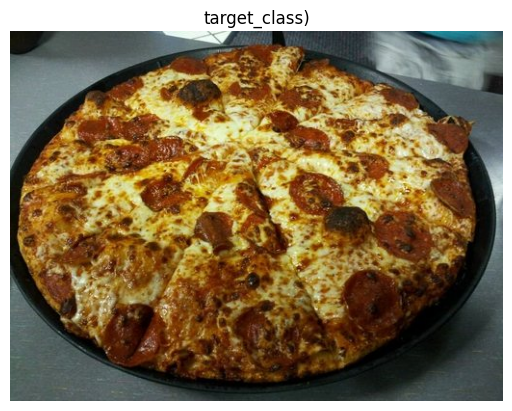

In [9]:
# View a ranodm image from the training dataset
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="pizza")

In [10]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(384, 512, 3), dtype=uint8, numpy=
array([[[ 16,  15,  10],
        [ 19,  18,  13],
        [ 19,  18,  13],
        ...,
        [ 48,  80,  91],
        [ 48,  80,  91],
        [ 48,  80,  91]],

       [[ 17,  16,  11],
        [ 19,  18,  13],
        [ 19,  18,  13],
        ...,
        [ 49,  81,  92],
        [ 48,  80,  91],
        [ 48,  80,  91]],

       [[ 17,  17,   9],
        [ 19,  19,  11],
        [ 19,  19,  11],
        ...,
        [ 51,  83,  94],
        [ 51,  81,  91],
        [ 51,  81,  91]],

       ...,

       [[ 88, 107, 101],
        [ 88, 107, 101],
        [ 87, 106, 102],
        ...,
        [ 57,  67,  69],
        [ 56,  66,  68],
        [ 56,  66,  68]],

       [[ 85, 104,  98],
        [ 84, 103,  97],
        [ 83, 102,  98],
        ...,
        [ 57,  67,  69],
        [ 56,  66,  68],
        [ 55,  65,  67]],

       [[ 77,  96,  90],
        [ 76,  95,  89],
        [ 75,  94,  90],
        ...,
        [ 56,  66,  6

In [11]:
# Pre-process the data

# Get all the pixel values between 0 and 1
img/255.

array([[[0.0627451 , 0.05882353, 0.03921569],
        [0.0745098 , 0.07058824, 0.05098039],
        [0.0745098 , 0.07058824, 0.05098039],
        ...,
        [0.18823529, 0.31372549, 0.35686275],
        [0.18823529, 0.31372549, 0.35686275],
        [0.18823529, 0.31372549, 0.35686275]],

       [[0.06666667, 0.0627451 , 0.04313725],
        [0.0745098 , 0.07058824, 0.05098039],
        [0.0745098 , 0.07058824, 0.05098039],
        ...,
        [0.19215686, 0.31764706, 0.36078431],
        [0.18823529, 0.31372549, 0.35686275],
        [0.18823529, 0.31372549, 0.35686275]],

       [[0.06666667, 0.06666667, 0.03529412],
        [0.0745098 , 0.0745098 , 0.04313725],
        [0.0745098 , 0.0745098 , 0.04313725],
        ...,
        [0.2       , 0.3254902 , 0.36862745],
        [0.2       , 0.31764706, 0.35686275],
        [0.2       , 0.31764706, 0.35686275]],

       ...,

       [[0.34509804, 0.41960784, 0.39607843],
        [0.34509804, 0.41960784, 0.39607843],
        [0.34117647, 0

## An end-to-end example

building the convolution neural network to find pattern in our images, more specifically:-

* Load our images
* Preprocess our images
* Build a CNN to find patterns in our images
* Compile our CNN
* Fit our CNN to our training data

In [12]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# set the random seed
tf.random.set_seed(42)

# Preprocess data(get all of the pixel values between 0 and 1, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# setup paths to our data directories
train_dir = "/content/pizza_steak/test"
test_dir = "/content/pizza_steak/test"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                                 batch_size = 32,
                                                 target_size=(224, 224),
                                                 class_mode = "binary",
                                                 seed = 42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir, batch_size = 32,
                                                 target_size = (224, 224),
                                                 class_mode= "binary",
                                                 seed = 42)

# Build a CNN model(same as the Tiny VGG on the CNN explainer website)
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size = 3,
                           activation ='relu',
                           input_shape= (224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding = "valid"),
    tf.keras.layers.Conv2D(10, 3, activation = 'relu'),
    tf.keras.layers.Conv2D(10, 3, activation = 'relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

# Compile our CNN
model_1.compile(loss="BinaryCrossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs = 5,
                        steps_per_epoch=len(train_data),
                        validation_data = valid_data,
                        validation_steps= len(valid_data))

Found 500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
16/16 [==============================] - 23s 299ms/step - loss: 0.6626 - accuracy: 0.6180 - val_loss: 0.5458 - val_accuracy: 0.7320
Epoch 2/5
16/16 [==============================] - 5s 303ms/step - loss: 0.4978 - accuracy: 0.7800 - val_loss: 0.4128 - val_accuracy: 0.8400
Epoch 3/5
16/16 [==============================] - 3s 179ms/step - loss: 0.3700 - accuracy: 0.8320 - val_loss: 0.3033 - val_accuracy: 0.8640
Epoch 4/5
16/16 [==============================] - 3s 176ms/step - loss: 0.3093 - accuracy: 0.8620 - val_loss: 0.3143 - val_accuracy: 0.8620
Epoch 5/5
16/16 [==============================] - 3s 181ms/step - loss: 0.2905 - accuracy: 0.8760 - val_loss: 0.2629 - val_accuracy: 0.8840


In [13]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

## Replicating the model we've built in the tensor flow playground

In [14]:
train_data

In [15]:
# Set the random seed
tf.random.set_seed(42)

# Create a model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (224, 224, 3)),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

# Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
model_2.fit(train_data,
            epochs=5,
            steps_per_epoch=len(train_data),
            validation_data=valid_data,
            validation_steps = len(valid_data)
            )

Epoch 1/5
16/16 [==============================] - 7s 308ms/step - loss: 0.7637 - accuracy: 0.5240 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
16/16 [==============================] - 3s 195ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
16/16 [==============================] - 4s 238ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
16/16 [==============================] - 3s 173ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
16/16 [==============================] - 3s 162ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [16]:
# Get the summary of model_2
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


Despite having 20x more parameters than our CNN(model_1), model_2 performs terribly than the model_1

## Improving the model


In [17]:
# Set the random seed
tf.random.set_seed(42)

# Create the model (mostly same as the one above)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compiling the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
16/16 [==============================] - 4s 174ms/step - loss: 8.4341 - accuracy: 0.5340 - val_loss: 0.7816 - val_accuracy: 0.7280
Epoch 2/5
16/16 [==============================] - 4s 272ms/step - loss: 1.7093 - accuracy: 0.6600 - val_loss: 2.3830 - val_accuracy: 0.6560
Epoch 3/5
16/16 [==============================] - 3s 161ms/step - loss: 0.8457 - accuracy: 0.7640 - val_loss: 0.4435 - val_accuracy: 0.7940
Epoch 4/5
16/16 [==============================] - 4s 252ms/step - loss: 0.6862 - accuracy: 0.7560 - val_loss: 1.0104 - val_accuracy: 0.7520
Epoch 5/5
16/16 [==============================] - 4s 252ms/step - loss: 0.7052 - accuracy: 0.7820 - val_loss: 0.7756 - val_accuracy: 0.6900


In [18]:
# Get the summary of the model_3
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


In [19]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

**Note:** The trainable parameters as patterns a model can learn form data. Intuitively, more is better in lots of casses but int he above case the difference here is  the two differentstyles of model we're using. We here a series of dense layers has a number of different learnable parameters connected to each other and hence a higher number of possible learnable patterns, **A CNN seeks to sort out and learn the most imp patterns in an image.** So even though these are les learnable parameters in our CNN, these are oftern more helpful in dechiphering between different features in an image.

## Binary Classification: Breaking it down

1. Becoming one with data
2. Preprocess the data ( prepared it for our model, the main step here was scaling/normalizing and turning our data into batches)
3. Created a model (start witha baeline)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve the model (try to beat our baseline)
7. Repeat until satisfied

### 1. Become one with the data

['3869679.jpg']
Image shape: (340, 512, 3)
['835833.jpg']
Image shape: (512, 307, 3)


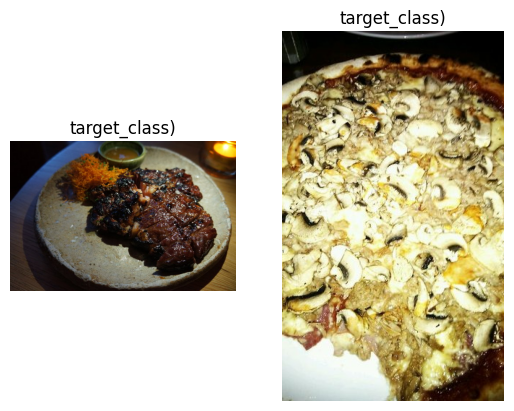

In [20]:
# Visualize data
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

## 2. Preprocess the data (prepare it for a model)

In [21]:
# Define directory data paths
train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"


Our next step is to turn our data into batches.

A batch is a small subgset of data. Rather than look at all images at one tme, a modle might only look at 32 at a time.

It does this for a couple of reasons:
1. 10,000 images (or more) might not fit in the memory of the processor (GPU).
2. Trying to learn the patterns in 10,000 images in one hit could result in the odel not being able to learn very well

In [22]:
 !nvidia-smi

Thu Aug 10 09:19:38 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P0    27W /  70W |   2955MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [23]:
# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1/255.)
test_datagen = ImageDataGenerator(rescale = 1/255.)

In [24]:
# Load in our image data formthe directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               target_size = (224, 224),
                                               class_mode = "binary",
                                               batch_size = 32)
test_data = test_datagen.flow_from_directory(directory = test_dir,
                                              target_size = (224, 224),
                                              class_mode = "binary",
                                              batch_size = 32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [25]:
# Get the sample of the train data batch
images, labels = train_data.next() # Get the "next" batch of images/labels in the train_data

In [26]:
len(images), len(labels)

(32, 32)

In [27]:
# How many batches are there?
len(train_data)

47

In [28]:
1500/32

46.875

In [29]:
# Get the first two images
images[: 2], images[0].shape

(array([[[[0.43529415, 0.3647059 , 0.30980393],
          [0.43529415, 0.36862746, 0.29803923],
          [0.44705886, 0.3803922 , 0.3019608 ],
          ...,
          [0.06666667, 0.07450981, 0.0627451 ],
          [0.04313726, 0.05882353, 0.05490196],
          [0.04705883, 0.0627451 , 0.06666667]],
 
         [[0.43529415, 0.3647059 , 0.30980393],
          [0.42352945, 0.35686275, 0.28627452],
          [0.43137258, 0.3647059 , 0.28627452],
          ...,
          [0.06666667, 0.07450981, 0.05490196],
          [0.04705883, 0.0627451 , 0.05882353],
          [0.04705883, 0.0627451 , 0.06666667]],
 
         [[0.40784317, 0.3372549 , 0.2901961 ],
          [0.41176474, 0.34509805, 0.27450982],
          [0.427451  , 0.36078432, 0.28235295],
          ...,
          [0.07450981, 0.07843138, 0.05490196],
          [0.0627451 , 0.07058824, 0.0509804 ],
          [0.05490196, 0.0627451 , 0.0509804 ]],
 
         ...,
 
         [[0.15686275, 0.14509805, 0.10980393],
          [0.10588

In [30]:
images[7], images[7].shape

(array([[[0.9568628 , 0.8235295 , 0.57254905],
         [0.9176471 , 0.7843138 , 0.53333336],
         [0.92549026, 0.79215693, 0.54509807],
         ...,
         [0.9725491 , 0.882353  , 0.7176471 ],
         [0.9960785 , 0.9058824 , 0.74509805],
         [0.98823535, 0.8980393 , 0.7372549 ]],
 
        [[0.89019614, 0.7568628 , 0.50980395],
         [0.909804  , 0.77647066, 0.5294118 ],
         [0.9215687 , 0.78823537, 0.5411765 ],
         ...,
         [0.96470594, 0.87843144, 0.7176471 ],
         [0.97647065, 0.8862746 , 0.7254902 ],
         [0.9686275 , 0.87843144, 0.7176471 ]],
 
        [[0.8980393 , 0.7568628 , 0.52156866],
         [0.9176471 , 0.77647066, 0.5411765 ],
         [0.909804  , 0.7686275 , 0.53333336],
         ...,
         [0.97647065, 0.89019614, 0.7294118 ],
         [0.96470594, 0.87843144, 0.7254902 ],
         [0.97647065, 0.882353  , 0.73333335]],
 
        ...,
 
        [[0.90196085, 0.7686275 , 0.4784314 ],
         [0.882353  , 0.75294125, 0.45098

In [31]:
labels

array([1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 0.,
       0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0.],
      dtype=float32)

### 3. Create a CNN model (start with a baseline)

A baseline is a relatively smple model or existing result that you setup when beginning a machine learning experiment and then as you keep experimenting , you try to beat the baseline.

**Note:** In deep learning there is almost an infinite amount of architectures you could create. So one of th ebest ways to get started is to start with something simple and see if it works on your data and then introduce complexity as required (e.g. look at which current model is working best in your field)

In [32]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential


In [33]:
# Create the model (this will be our baseline, a layer CNN)
model_4 = Sequential([
    Conv2D(filters=10, # filter is the number of sliding windows going across an input (higher = more complex model)
           kernel_size=3, # the size of the sliding window going across an input
           strides=1, # the size of the step the sliding window takes across an input
           padding="valid", # if 'same', output shape is same as input shape, if 'valid', output shape gets compressed
           activation="relu",
           input_shape=(224, 224, 3)),# input layer (specify input shape)
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    Flatten(),
    Dense(1, activation = "sigmoid")# output layer(working with binary classification so only 1 o/p neuron)
])

In [34]:
model_4.compile(loss = "binary_crossentropy",
                optimizer = Adam(),
                metrics = ["accuracy"])


### 4. Fit the model

In [35]:
# Get a summary of the model
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


In [36]:
# Check the lengths of training and test data generators
len(train_data), len(test_data)

(47, 16)

In [37]:
# Fit the model
history_4 = model_4.fit(train_data, epochs=5,
                        steps_per_epoch = len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 9s 143ms/step - loss: 0.9268 - accuracy: 0.5840 - val_loss: 0.6420 - val_accuracy: 0.5900
Epoch 2/5
47/47 [==============================] - 8s 161ms/step - loss: 0.4782 - accuracy: 0.7987 - val_loss: 0.4054 - val_accuracy: 0.8240
Epoch 3/5
47/47 [==============================] - 7s 149ms/step - loss: 0.3241 - accuracy: 0.8807 - val_loss: 0.4170 - val_accuracy: 0.8200
Epoch 4/5
47/47 [==============================] - 6s 118ms/step - loss: 0.1901 - accuracy: 0.9333 - val_loss: 0.4513 - val_accuracy: 0.8140
Epoch 5/5
47/47 [==============================] - 8s 165ms/step - loss: 0.0848 - accuracy: 0.9827 - val_loss: 0.4669 - val_accuracy: 0.8020


In [38]:
model_1.evaluate(test_data)

16/16 [==============================] - 1s 84ms/step - loss: 0.2629 - accuracy: 0.8840


[0.26285889744758606, 0.8840000033378601]

In [39]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

### 5. Evaluating our model

It looks like our model is learning something, let's evaluate it.


<Axes: >

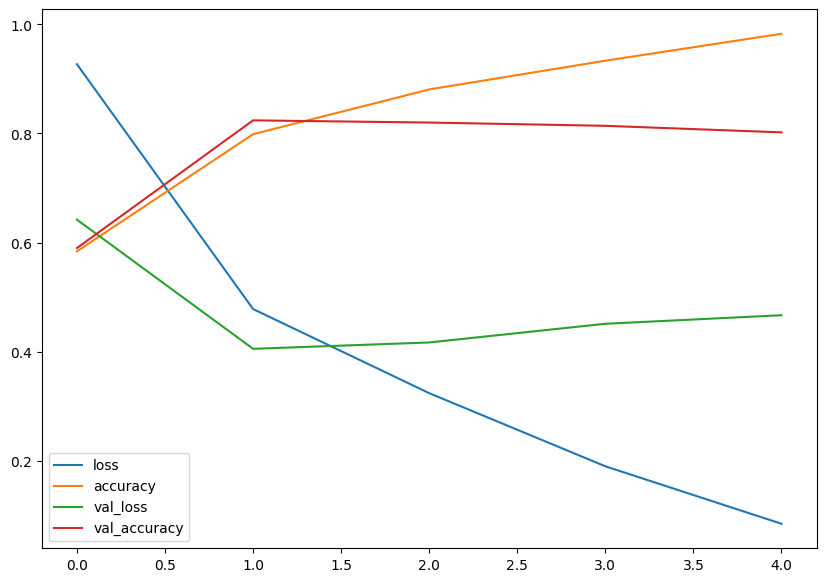

In [40]:
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10, 7))

In [41]:
# Plot the validation and training curves separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]
  epochs = range(len(history.history["loss"]))

  # Plot loss

  plt.plot(epochs, loss, label = "training_loss")
  plt.plot(epochs, val_loss, label = "val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  #Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label = "training_accuracy")
  plt.plot(epochs, val_accuracy, label = "val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

**Note:** When a model's **validatiaon loss starts to increase**, it's likely that the model is **overfitting** the training dataset.

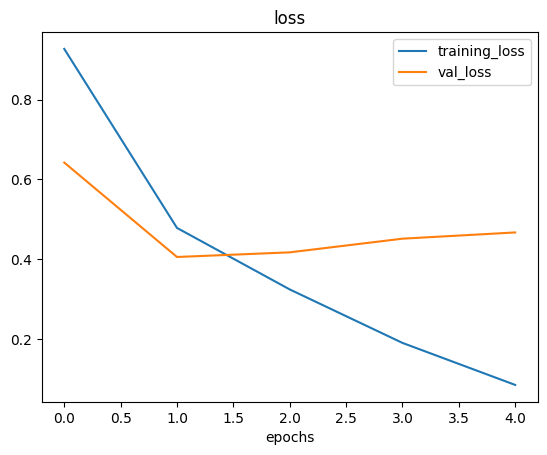

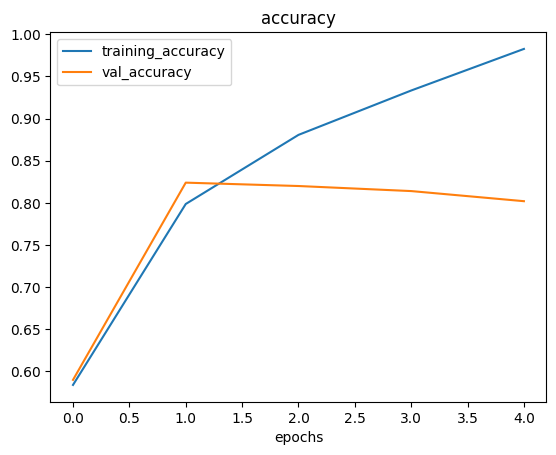

In [42]:
plot_loss_curves(history_4)

### 6. Adjust the model parameters

Fitting a ML model comes in 3 steps:

0. Create a baseline
1. Beat the baseline by overfitting a larger model
2. Reduce overfitting

Ways to induce overfitting:
* Increase the number of conv layers
* Increase the number of conv filters
* Add another dense layer to the output of our flattend layer

Reduce overfitting:
* Add data augmentaion
* Add regularization layers (such as MaxPool2D)
* Add more data...

In [43]:
# Create the model(this is going to be our new baseline)

model_5=Sequential([
    Conv2D(10, 3, activation = 'relu', input_shape=(224, 224, 3)),
    MaxPool2D(pool_size = 2),
    Conv2D(10, 3, activation = 'relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation = 'relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation = "sigmoid")
])

In [44]:
# Compile the model
model_5.compile(loss = "binary_crossentropy",
                optimizer = "Adam",
                metrics = ['accuracy'])
# fit the model
history_5 = model_5.fit(train_data,
            epochs = 5,
            steps_per_epoch = len(train_data),
            validation_data = test_data,
            validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 10s 175ms/step - loss: 0.6176 - accuracy: 0.6273 - val_loss: 0.4945 - val_accuracy: 0.7480
Epoch 2/5
47/47 [==============================] - 5s 116ms/step - loss: 0.4693 - accuracy: 0.7780 - val_loss: 0.6089 - val_accuracy: 0.6460
Epoch 3/5
47/47 [==============================] - 5s 114ms/step - loss: 0.4373 - accuracy: 0.8013 - val_loss: 0.3671 - val_accuracy: 0.8160
Epoch 4/5
47/47 [==============================] - 5s 113ms/step - loss: 0.4067 - accuracy: 0.8273 - val_loss: 0.3591 - val_accuracy: 0.8260
Epoch 5/5
47/47 [==============================] - 6s 132ms/step - loss: 0.3748 - accuracy: 0.8373 - val_loss: 0.4132 - val_accuracy: 0.7940


In [45]:
model_5.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)      

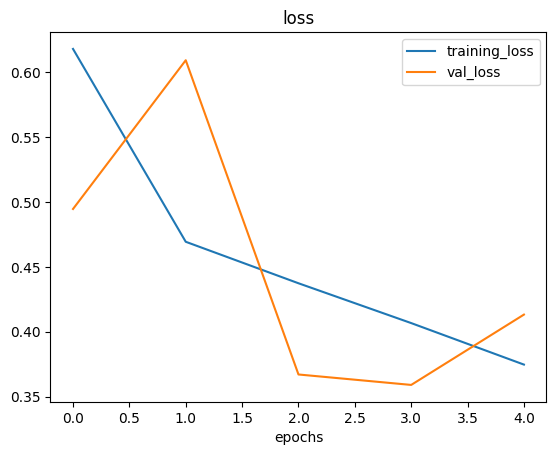

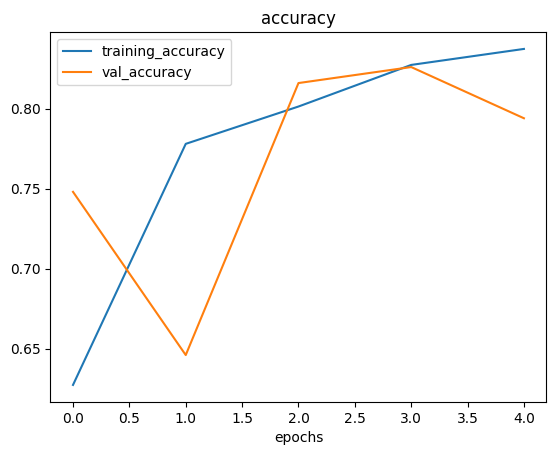

In [46]:
plot_loss_curves(history_5)

### finding data augmentation


In [47]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale = 1/255.,
                                             rotation_range = 0.2, # how much do you want ot rotate an image
                                             shear_range = 0.2, # how much do you want ot shear an image
                                             zoom_range = 0.2, # zoom in randomly on an image
                                             width_shift_range = 0.2, # move our yimage around on the x-axis
                                             height_shift_range = 0.3, # move your image around on the y-axis
                                             horizontal_flip = True)# do you want to flip and image

# Create ImageDataGenerator training instance without data augmentation
trian_datagen = ImageDataGenerator(rescale = 1/ 255.)

# Create ImageDataGenerator without data augmentaion for the test data
test_datagen = ImageDataGenerator(rescale = 1/255.)

Data augmentation is the process of altering our training data, loading it to have more diversity and in turn allowing our models to learn more generalizble (hopefully) patterns.
Altering might mean adjusting the rotation of an image, flipping it , cropping it or something similar

In [48]:
# Import data and augment it from trainiing directory
print("Augmented training data")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size = (224, 224),
                                                                   class_mode = "binary",
                                                                   batch_size = 32,
                                                                   shuffle= False)

# Create non-augmented train data batches
print("Non-augmented training data")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size = (224, 224),
                                               class_mode = "binary",
                                               batch_size = 32,
                                               shuffle = False)
img_size = (224, 224)
# Create non-augmented test data batches
print("Non-augmented test data")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size = (224, 224),
                                             class_mode = "binary",
                                             batch_size = 32,
                                             shuffle = False)

Augmented training data
Found 1500 images belonging to 2 classes.
Non-augmented training data
Found 1500 images belonging to 2 classes.
Non-augmented test data
Found 500 images belonging to 2 classes.


Data augmentaion is usually only performed on the training data. Using `ImageDataGenerator` built-in data augmentation parameters our images are left as they are in the directories but are modified as they're loaded into the model.

In [49]:
# Get some data batches
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() # note: labels aren't augmented only data images

showing image number 9


(-0.5, 223.5, 223.5, -0.5)

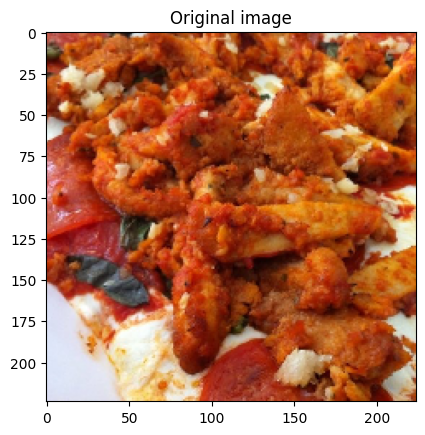

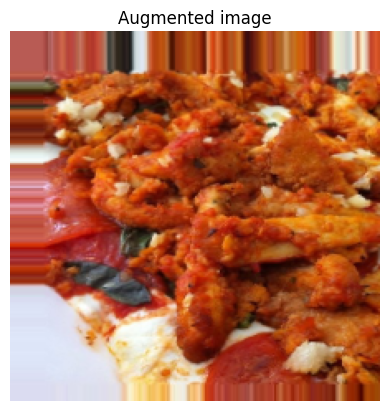

In [51]:
# Showing original and the augmented image
import random
random_number = random.randint(0, 32)
print(f"showing image number {random_number}")
plt.imshow(images[random_number])
plt.title("Original image")
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False)

In [52]:
# Training the model with augmented data
model_6 = Sequential([
    Conv2D(10, 3,activation = "relu"),
    MaxPool2D(pool_size = 2),
    Conv2D(10, 3, activation = 'relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation = 'relu'),
    Flatten(),
    Dense(1, activation = "sigmoid")
])

# Compile the model
model_6.compile(loss = "binary_crossentropy",
                optimizer = "Adam",
                metrics = ["accuracy"])

# Fit the augmented data to the model
history_6 = model_6.fit(train_data_augmented,
            epochs = 5,
            steps_per_epoch = len(train_data_augmented),
            validation_data = test_data,
            validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 25s 485ms/step - loss: 0.7964 - accuracy: 0.4127 - val_loss: 0.6892 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 23s 485ms/step - loss: 0.7005 - accuracy: 0.4807 - val_loss: 0.6931 - val_accuracy: 0.4940
Epoch 3/5
47/47 [==============================] - 21s 453ms/step - loss: 0.6931 - accuracy: 0.4940 - val_loss: 0.6923 - val_accuracy: 0.5080
Epoch 4/5
47/47 [==============================] - 21s 449ms/step - loss: 0.6937 - accuracy: 0.5007 - val_loss: 0.6890 - val_accuracy: 0.5040
Epoch 5/5
47/47 [==============================] - 22s 479ms/step - loss: 0.6879 - accuracy: 0.5280 - val_loss: 0.6612 - val_accuracy: 0.5000


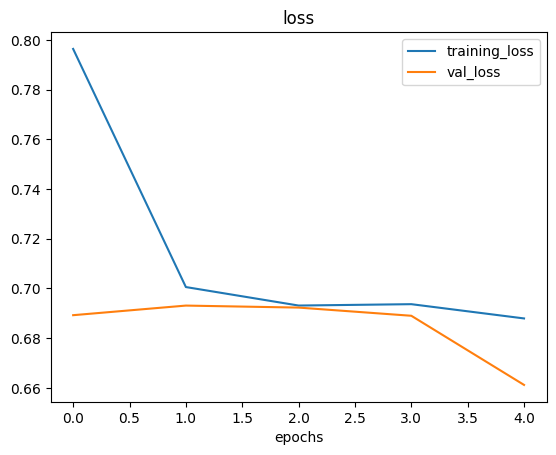

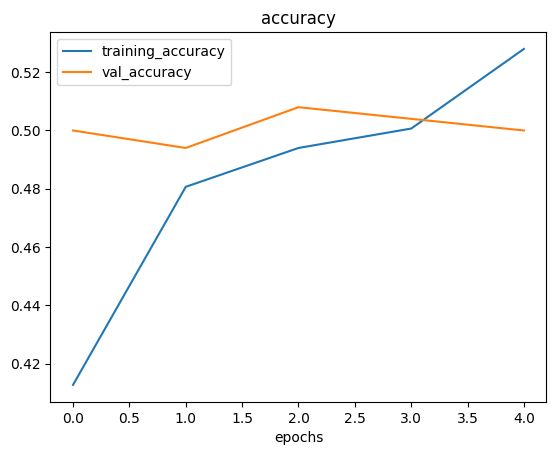

In [53]:
# check the models training curves
plot_loss_curves(history_6)

In [54]:
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   batch_size = 32,
                                                                   target_size = (224, 224),
                                                                   class_mode = "binary",
                                                                   shuffle = True)

Found 1500 images belonging to 2 classes.


In [55]:
# Training a new model on the data on the shuffled data
model_7 = Sequential([
    Conv2D(10, 3, activation = 'relu'),
    MaxPool2D(pool_size = 2),
    Conv2D(10, 3, activation = 'relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation = 'relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation = "sigmoid")
])

# Compile the model
model_7.compile(loss = "binary_crossentropy",
                optimizer = "Adam",
                metrics = ["accuracy"])

# Fit the model
history_7 = model_7.fit(train_data_augmented,
            epochs = 5,
            steps_per_epoch = len(train_data_augmented),
            validation_data = test_data,
            validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 22s 439ms/step - loss: 0.6610 - accuracy: 0.6060 - val_loss: 0.5573 - val_accuracy: 0.7540
Epoch 2/5
47/47 [==============================] - 22s 478ms/step - loss: 0.5610 - accuracy: 0.7060 - val_loss: 0.4181 - val_accuracy: 0.8260
Epoch 3/5
47/47 [==============================] - 24s 512ms/step - loss: 0.5379 - accuracy: 0.7260 - val_loss: 0.3944 - val_accuracy: 0.8280
Epoch 4/5
47/47 [==============================] - 21s 441ms/step - loss: 0.4891 - accuracy: 0.7773 - val_loss: 0.3279 - val_accuracy: 0.8500
Epoch 5/5
47/47 [==============================] - 22s 479ms/step - loss: 0.4751 - accuracy: 0.7740 - val_loss: 0.3216 - val_accuracy: 0.8700


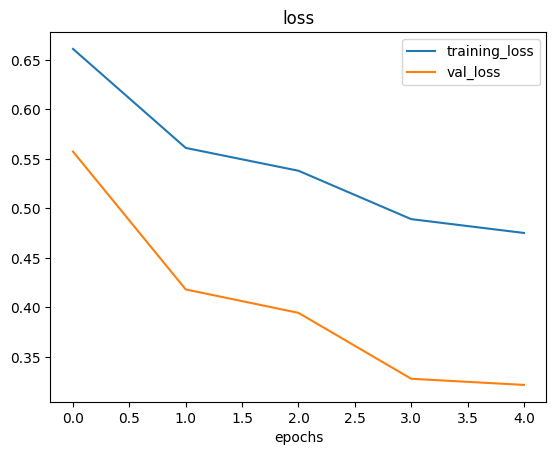

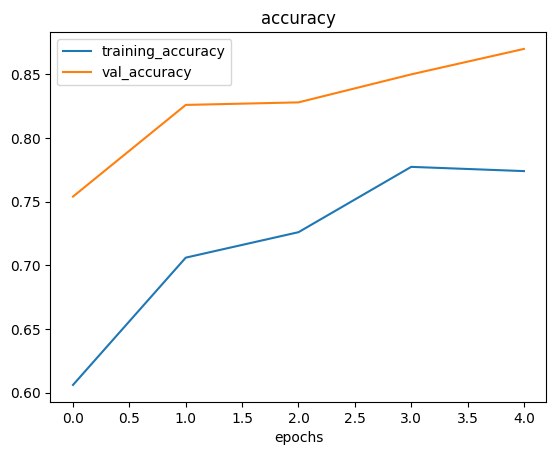

In [56]:
# Plot the loss curves
plot_loss_curves(history_7)

In [57]:
# recreating the model same as the CNN as in cnn explainer
model_8 = Sequential([
    Conv2D(20, 3, activation = 'relu'),
    Conv2D(20, 3, activation = 'relu'),
    MaxPool2D(),
    Conv2D(20, 3, activation = 'relu'),
    Conv2D(20, 3, activation = 'relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation = 'sigmoid')
])
# compile the model
model_8.compile(loss="binary_crossentropy",
                optimizer = "Adam",
                metrics = ["accuracy"])
# fit the model
history_8 = model_8.fit(train_data_augmented,
            epochs = 5,
            steps_per_epoch = len(train_data_augmented),
            validation_data = test_data,
            validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 28s 530ms/step - loss: 0.6608 - accuracy: 0.6080 - val_loss: 0.5222 - val_accuracy: 0.7060
Epoch 2/5
47/47 [==============================] - 23s 487ms/step - loss: 0.5421 - accuracy: 0.7333 - val_loss: 0.3993 - val_accuracy: 0.8200
Epoch 3/5
47/47 [==============================] - 22s 465ms/step - loss: 0.5163 - accuracy: 0.7640 - val_loss: 0.3848 - val_accuracy: 0.8380
Epoch 4/5
47/47 [==============================] - 24s 505ms/step - loss: 0.4878 - accuracy: 0.7633 - val_loss: 0.3900 - val_accuracy: 0.8440
Epoch 5/5
47/47 [==============================] - 24s 506ms/step - loss: 0.4871 - accuracy: 0.7807 - val_loss: 0.3431 - val_accuracy: 0.8580


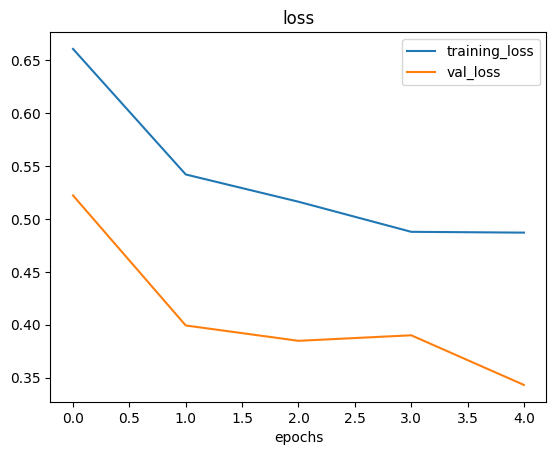

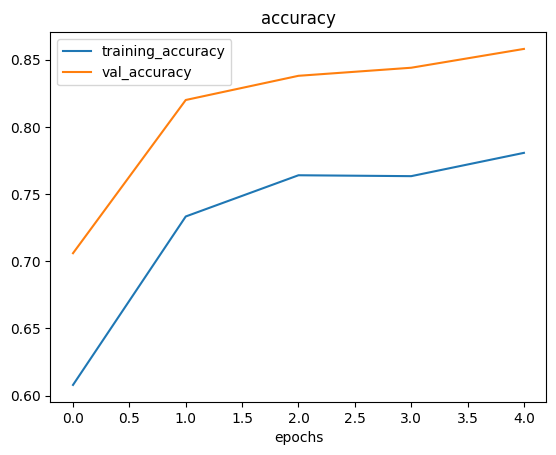

In [58]:
plot_loss_curves(history_8)

## Making a prediction with our trained model on our own custom data

In [59]:
# Calsses we're working with
print(class_names)

['pizza' 'steak']


In [60]:
!wget https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-steak.jpeg?raw=true

--2023-08-10 09:31:12--  https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-steak.jpeg?raw=true
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/mrdbourke/tensorflow-deep-learning/raw/main/images/03-steak.jpeg [following]
--2023-08-10 09:31:12--  https://github.com/mrdbourke/tensorflow-deep-learning/raw/main/images/03-steak.jpeg
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg [following]
--2023-08-10 09:31:13--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.

In [61]:
import matplotlib.image as mpimg
steak = mpimg.imread("03-steak.jpeg?raw=true")
steak

array([[[162, 158, 149],
        [163, 159, 150],
        [166, 162, 153],
        ...,
        [136,  17,  23],
        [140,  21,  27],
        [140,  21,  27]],

       [[164, 160, 151],
        [164, 160, 151],
        [164, 160, 151],
        ...,
        [133,  14,  20],
        [134,  15,  21],
        [137,  18,  24]],

       [[166, 162, 153],
        [165, 161, 152],
        [163, 159, 150],
        ...,
        [136,  17,  23],
        [134,  15,  21],
        [136,  17,  23]],

       ...,

       [[154, 132, 111],
        [142, 121, 100],
        [101,  80,  59],
        ...,
        [164, 155, 148],
        [152, 141, 135],
        [140, 129, 123]],

       [[141, 119,  96],
        [138, 118,  94],
        [106,  85,  64],
        ...,
        [158, 147, 141],
        [142, 131, 125],
        [138, 127, 121]],

       [[148, 126, 102],
        [148, 128, 103],
        [114,  93,  72],
        ...,
        [153, 142, 136],
        [138, 127, 121],
        [143, 132, 126]]

(-0.5, 3023.5, 4031.5, -0.5)

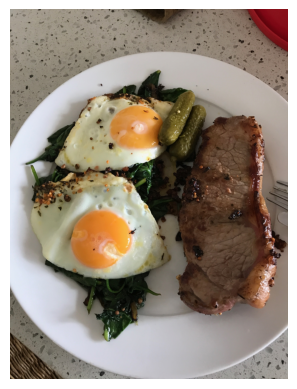

In [62]:
plt.imshow(steak)
plt.axis(False)

In [63]:
# Check the shape fo our image
steak.shape

(4032, 3024, 3)

In [64]:
steak

array([[[162, 158, 149],
        [163, 159, 150],
        [166, 162, 153],
        ...,
        [136,  17,  23],
        [140,  21,  27],
        [140,  21,  27]],

       [[164, 160, 151],
        [164, 160, 151],
        [164, 160, 151],
        ...,
        [133,  14,  20],
        [134,  15,  21],
        [137,  18,  24]],

       [[166, 162, 153],
        [165, 161, 152],
        [163, 159, 150],
        ...,
        [136,  17,  23],
        [134,  15,  21],
        [136,  17,  23]],

       ...,

       [[154, 132, 111],
        [142, 121, 100],
        [101,  80,  59],
        ...,
        [164, 155, 148],
        [152, 141, 135],
        [140, 129, 123]],

       [[141, 119,  96],
        [138, 118,  94],
        [106,  85,  64],
        ...,
        [158, 147, 141],
        [142, 131, 125],
        [138, 127, 121]],

       [[148, 126, 102],
        [148, 128, 103],
        [114,  93,  72],
        ...,
        [153, 142, 136],
        [138, 127, 121],
        [143, 132, 126]]

In [65]:
# steak = tf.expand_dims(steak, axis = 0)

In [66]:
steak.shape

(4032, 3024, 3)

In [67]:
# Creating a function to import an image and resize it to be albe ot be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turn it into a tensor and reshape it
  to (img_shape, img_shape, colour_channels).
  """

  # Read in the image
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor
  img = tf.image.decode_image(img)

  # Resize the image
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image ( get all values between 0 and 1)
  img = img/ 225.0

  return img

In [68]:
# Load in and preprocess the image
steak = load_and_prep_image("03-steak.jpeg?raw=true")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.7227778 , 0.705     , 0.6561111 ],
        [0.7372222 , 0.7161111 , 0.66833335],
        [0.7161111 , 0.6894444 , 0.63611114],
        ...,
        [0.5911111 , 0.05777778, 0.10222222],
        [0.5611111 , 0.04777778, 0.08      ],
        [0.5988889 , 0.08777778, 0.11888889]],

       [[0.75      , 0.7322222 , 0.69222224],
        [0.7238889 , 0.70611113, 0.6527778 ],
        [0.74333334, 0.71666664, 0.66333336],
        ...,
        [0.6066667 , 0.07777778, 0.10444444],
        [0.60055554, 0.06722222, 0.10722222],
        [0.5827778 , 0.06277778, 0.09833334]],

       [[0.73888886, 0.7211111 , 0.6677778 ],
        [0.72444445, 0.69555557, 0.6433333 ],
        [0.7438889 , 0.71055555, 0.66055554],
        ...,
        [0.6022222 , 0.07333333, 0.09111111],
        [0.5977778 , 0.07777778, 0.11333334],
        [0.5922222 , 0.05888889, 0.09888889]],

       ...,

       [[0.5588889 , 0.48444444, 0.35166666],
        [0.06

In [69]:
pred = model_8.predict(tf.expand_dims(steak, axis = 0))

1/1 [==============================] - 0s 242ms/step


Looks like our custom image is being put through our model, however , it currently output a predictio probability lets visualize the image as well as the model's prediction?

In [70]:
# Remind ourselves of our class names
class_names

array(['pizza', 'steak'], dtype='<U5')

In [71]:
tf.round(pred)

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[1.]], dtype=float32)>

In [72]:
# We can find our desired class by indexing it to the classnames by round off
pred_class = class_names[int(tf.round(pred))]

In [73]:
pred_class

'steak'

In [74]:
def pred_and_plot(model, filename, class_names = class_names):
  """
  Imports an image located at filename, makes a prediction with model and plot
  the image with the predicted class as the title
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis = 0))

  # Plot the image and predited class
  plt.imshow(img)
  plt.title(f"Prediction : {pred_class}")
  plt.axis(False);

  return pred_class

1/1 [==============================] - 0s 18ms/step


'steak'

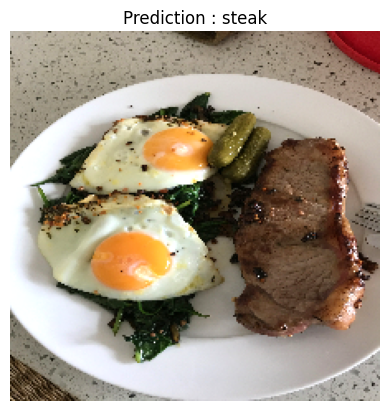

In [75]:
pred_and_plot(model_8, "03-steak.jpeg?raw=true", class_names)

In [76]:
!wget https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-pizza-dad.jpeg?raw=true

--2023-08-10 09:31:16--  https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-pizza-dad.jpeg?raw=true
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/mrdbourke/tensorflow-deep-learning/raw/main/images/03-pizza-dad.jpeg [following]
--2023-08-10 09:31:17--  https://github.com/mrdbourke/tensorflow-deep-learning/raw/main/images/03-pizza-dad.jpeg
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg [following]
--2023-08-10 09:31:17--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to ra

1/1 [==============================] - 0s 23ms/step


'steak'

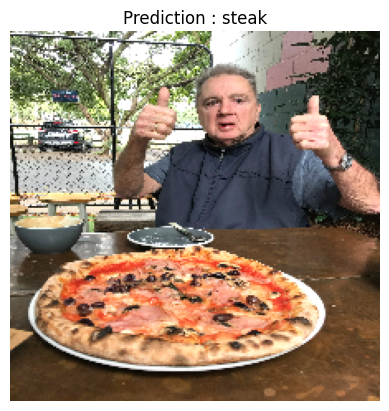

In [77]:
pred_and_plot(model_8, "03-pizza-dad.jpeg?raw=true")

# Multi-class Image Classification

1. Become one with the data
2. Preprocess the data (et it ready for a model)
3. Create a model (start with a baseline)
4. Fit the model (ovverfit it to make sure it works)
5. Evaluate the model
6. Adjust different hyperparameters and imporve the model (try to beat baseline/ reduce overfitting)

## 1. Import and become one with the data

In [78]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

--2023-08-10 09:31:18--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.107.128, 74.125.199.128, 142.250.99.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.107.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  49.7MB/s    in 6.8s    

2023-08-10 09:31:25 (72.6 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [79]:
import zipfile

zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip")
zip_ref.extractall()
zip_ref.close()

In [80]:
import os

# Walk through 10 classes of food image data
for dirpath, dirname, filename in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirname)} directories and {len(filename)} files in the file path {dirpath}")

There are 2 directories and 0 files in the file path 10_food_classes_all_data
There are 10 directories and 0 files in the file path 10_food_classes_all_data/train
There are 0 directories and 750 files in the file path 10_food_classes_all_data/train/hamburger
There are 0 directories and 750 files in the file path 10_food_classes_all_data/train/chicken_curry
There are 0 directories and 750 files in the file path 10_food_classes_all_data/train/grilled_salmon
There are 0 directories and 750 files in the file path 10_food_classes_all_data/train/ramen
There are 0 directories and 750 files in the file path 10_food_classes_all_data/train/fried_rice
There are 0 directories and 750 files in the file path 10_food_classes_all_data/train/pizza
There are 0 directories and 750 files in the file path 10_food_classes_all_data/train/chicken_wings
There are 0 directories and 750 files in the file path 10_food_classes_all_data/train/ice_cream
There are 0 directories and 750 files in the file path 10_food_

In [81]:
!ls -la 10_food_classes_all_data/

total 16
drwxr-xr-x  4 root root 4096 Aug 10 09:31 .
drwxr-xr-x  1 root root 4096 Aug 10 09:31 ..
drwxr-xr-x 12 root root 4096 Aug 10 09:31 test
drwxr-xr-x 12 root root 4096 Aug 10 09:31 train


In [82]:
# Setup the train and test directories
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"


In [83]:
# Let's get the subdirectories ( these are